# Imports

In [1]:
import pandas as pd
from statistics import mean
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.metrics import classification_report

# Information

Within this notebook, I show the overall analyses I have performed for the results section for the static system in my Master's thesis.

I start by showing the best f1-score and threshold as the starting point for the research shown here.
Afterwards, I move into the general distribution of the labels using the best threshold for *all* data.
I follow this up by the F1-scores of the *gold data subset* for each genre and an analysis is multiple patterns found within this subset of the data.

# General

## F1-score with Best threshold (Taken from Treshold testing)

In [2]:
thresholds = pd.read_csv('../results/static_semi_supervised_thresholds.tsv', sep='\t', index_col=0)
display(thresholds.style.highlight_max(subset=['f1-score'], color = 'mediumseagreen', axis = 0))

,precision,recall,f1-score,support,t_metric
0.400000,0.629441,0.620175,0.439677,125.000000,basic
0.450000,0.655784,0.683333,0.533582,125.000000,basic
0.500000,0.666667,0.728070,0.634975,125.000000,basic
0.550000,0.580882,0.596491,0.583333,125.000000,basic
0.600000,0.602604,0.581579,0.587218,125.000000,basic


In [3]:
best_report = pd.read_csv('../results/static_semi_supervised_best_thres_report.tsv', sep='\t', index_col=0)
print('Classification report')
print(best_report.to_string().replace('NaN', '   ').replace('accuracy', '\naccuracy'))

Classification report
                precision    recall  f1-score  support
Creative Shift   0.400000  0.866667  0.547368     30.0
Reproduction     0.933333  0.589474  0.722581     95.0

accuracy                             0.656000    125.0
macro avg        0.666667  0.728070  0.634975    125.0
weighted avg     0.805333  0.656000  0.680530    125.0


## Overview Graph showing human and machine data label distribution

In [101]:
data = pd.read_csv('../results/static_semi_supervised_data.tsv', sep='\t')
data_mt = pd.read_csv('../results/machine_static_semi_supervised_data.tsv', sep='\t')

In [102]:
df_amount = defaultdict(list)
for genre in data.genre.unique():
    for key, value in data[data.genre == genre].static_labels.value_counts().to_dict().items():
        df_amount['Genre'].append(genre)
        df_amount['Repro/Shift'].append(key)
        df_amount['Number'].append(value)
df_amount = pd.DataFrame.from_dict(df_amount)

df_amount_mt = defaultdict(list)
for genre in data_mt.genre.unique():
    for key, value in data_mt[data_mt.genre == genre].static_labels.value_counts().to_dict().items():
        df_amount_mt['Genre'].append(genre)
        df_amount_mt['Repro/Shift'].append(key)
        df_amount_mt['Number'].append(value)
df_amount_mt = pd.DataFrame.from_dict(df_amount_mt)

In [103]:
df_amount.loc[2, 'Genre'] = 'children family'
df_amount.loc[3, 'Genre'] = 'children family'
df_amount_mt.loc[2, 'Genre'] = 'children family'
df_amount_mt.loc[3, 'Genre'] = 'children family'

In [104]:
display(df_amount, df_amount_mt)

,Genre,Repro/Shift,Number
0,action,Reproduction,48656
1,action,Creative Shift,15833
2,children family,Reproduction,58355
3,children family,Creative Shift,15738
4,comedy,Reproduction,75789
5,comedy,Creative Shift,19221
6,documentary,Reproduction,79482
7,documentary,Creative Shift,18320
8,drama,Reproduction,70476
9,drama,Creative Shift,19130


,Genre,Repro/Shift,Number
0,action,Reproduction,67231
1,action,Creative Shift,12802
2,children family,Reproduction,78262
3,children family,Creative Shift,12494
4,comedy,Reproduction,102272
5,comedy,Creative Shift,15836
6,documentary,Reproduction,103499
7,documentary,Creative Shift,14656
8,drama,Reproduction,94783
9,drama,Creative Shift,15390


In [105]:
display(df_amount.groupby(['Genre']).sum(), 
        df_amount_mt.groupby(['Genre']).sum())

,Repro/Shift,Number
Genre,,
action,ReproductionCreative Shift,64489
children family,ReproductionCreative Shift,74093
comedy,ReproductionCreative Shift,95010
documentary,ReproductionCreative Shift,97802
drama,ReproductionCreative Shift,89606


,Repro/Shift,Number
Genre,,
action,ReproductionCreative Shift,80033
children family,ReproductionCreative Shift,90756
comedy,ReproductionCreative Shift,118108
documentary,ReproductionCreative Shift,118155
drama,ReproductionCreative Shift,110173


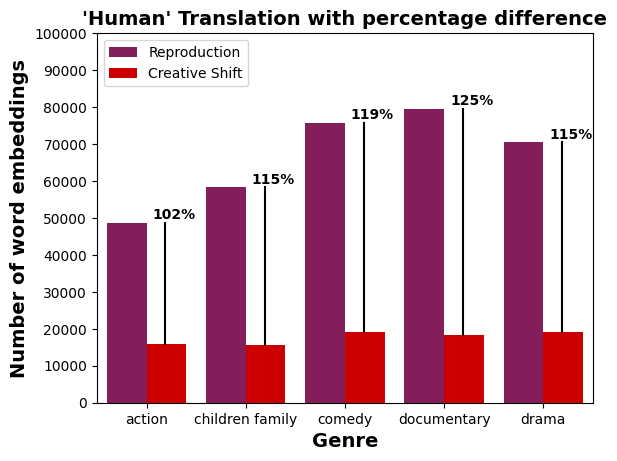

In [122]:

colors = ['#841e5a', '#cc0000']

t = sns.barplot(x = 'Genre', y = 'Number', hue = 'Repro/Shift', data = df_amount,
            # palette = 'hls',
            # palette = 'rocket',
            palette = colors,
            # order = ['male', 'female'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            errorbar = 'sd'   
            )

start_loc = (0.19, .06)
# t_nor = lambda a : 1 / 63000 * a
t_nor = lambda a : 1 / 100000 * a
per_diff = lambda a, b, c=None : round(((a - b) / mean([a, b])) * 100, c)

for idx, g in enumerate(df_amount.Genre.unique()):
    line_min = df_amount[(df_amount.Genre == g) & (df_amount['Repro/Shift'] == 'Creative Shift')].Number.sum()
    line_max = df_amount[(df_amount.Genre == g) & (df_amount['Repro/Shift'] == 'Reproduction')].Number.sum()
    t.axvline(start_loc[0]+(1*idx), t_nor(line_min), t_nor(line_max), color='black')
    t.text(start_loc[1]+(1*idx), line_max+1000, '{}%'.format(per_diff(line_max, line_min)), weight=600)


t.set(ylim=(0, 90000))
t.legend(loc="upper left")
# sns.move_legend(t, "upper left", bbox_to_anchor=(1, 1))
plt.yticks(range(0, 110000, 10000))
plt.title('\'Human\' Translation with percentage difference', size=14, weight=600)
plt.xlabel('Genre', size=14, weight=600)
plt.ylabel('Number of word embeddings', size=14, weight=600)
plt.show()

In [123]:
t.figure.savefig('../results/figures/static_human_barplot.pdf', format='pdf', bbox_inches="tight")

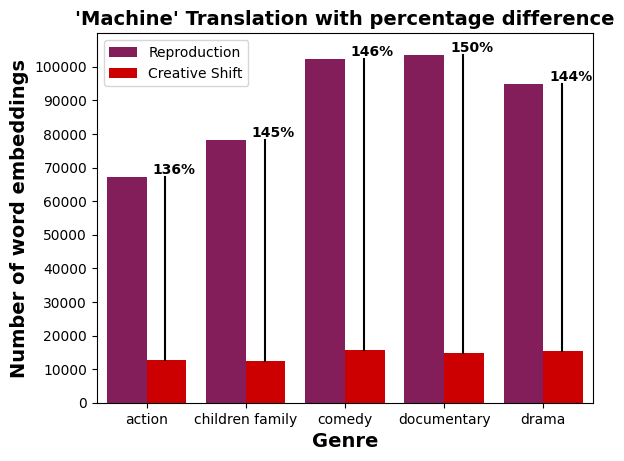

In [124]:
colors = ['#841e5a', '#cc0000']

t = sns.barplot(x = 'Genre', y = 'Number', hue = 'Repro/Shift', data = df_amount_mt,
            # palette = 'hls',
            # palette = 'rocket',
            palette = colors,
            # order = ['male', 'female'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            errorbar = 'sd'   
            )

start_loc = (0.19, .06)
# t_nor = lambda a : 1 / 63000 * a
t_nor = lambda a : 1 / 110000 * a
per_diff = lambda a, b, c=None : round(((a - b) / mean([a, b])) * 100, c)

for idx, g in enumerate(df_amount.Genre.unique()):
    line_min = df_amount_mt[(df_amount_mt.Genre == g) & (df_amount_mt['Repro/Shift'] == 'Creative Shift')].Number.sum()
    line_max = df_amount_mt[(df_amount_mt.Genre == g) & (df_amount_mt['Repro/Shift'] == 'Reproduction')].Number.sum()
    t.axvline(start_loc[0]+(1*idx), t_nor(line_min), t_nor(line_max), color='black')
    t.text(start_loc[1]+(1*idx), line_max+1000, '{}%'.format(per_diff(line_max, line_min)), weight=600)


t.set(ylim=(0, 110000))
t.legend(loc="upper left")
plt.yticks(range(0, 110000, 10000))
# sns.move_legend(t, "upper left", bbox_to_anchor=(1, 1))
plt.title('\'Machine\' Translation with percentage difference', size=14, weight=600)
plt.xlabel('Genre', size=14, weight=600)
plt.ylabel('Number of word embeddings', size=14, weight=600)
plt.show()

In [125]:
t.figure.savefig('../results/figures/static_machine_barplot.pdf', format='pdf', bbox_inches="tight")

# Genres

In [18]:
gold = pd.read_csv('../results/static_semi_supervised_best_thres_gold.tsv', sep='\t', index_col=0)

In [19]:
for idx, i in gold.iterrows():
    cur_df = data[(data.sent_idx == i.sent_idx) & (data.film == i.film)][['src_sent', 'tgt_sent']][:1].copy()
    if idx == 0:
        sent_df = cur_df
    else:
        sent_df = pd.concat([sent_df, cur_df])

sent_df.reset_index(drop=True, inplace=True)
gold = pd.concat([gold, sent_df], axis=1)

In [20]:
gold = gold[['genre', 'film', 'sent_idx', 'src_sent', 'tgt_sent', 'src', 'tgt', 'static_cosine', 'human_label', 'labels']]
gold

,genre,film,sent_idx,src_sent,tgt_sent,src,tgt,static_cosine,human_label,labels
0,action,AC01,0,The Inquisition has finally delivered Spain to...,"Andalusië , Spanje , 1492 De Inquisitie heeft ...",delivered,overgedragen,0.474036,Reproduction,Reproduction
1,action,AC01,1,Sultan Muhammad and his people still hold out ...,Sultan Mohammed en zijn mensen zitten nog in G...,his,zijn,0.442340,Reproduction,Reproduction
2,action,AC01,5,swear to honor our Order in the fight for free...,zweert gij trouw aan de Orde ?,swear,zweert,0.534009,Reproduction,Creative Shift
3,action,AC01,8,I swear .,Dat zweer ik .,I,Dat,0.615675,Creative Shift,Creative Shift
4,action,AC01,37,Sit down . You 're making me nervous .,Ga zitten . U maakt me nerveus .,Sit,Ga,0.640848,Creative Shift,Creative Shift
...,...,...,...,...,...,...,...,...,...,...
120,drama,DR02,331,Poor men fighting a rich man 's war .,Armen die vochten voor de rijken .,Poor,Armen,0.745218,Reproduction,Creative Shift
121,drama,DR02,335,"Point is , us old soldiers gotta live , right ?",Wij oud-soldaten moeten ook rondkomen .,gotta,moeten,0.479617,Reproduction,Reproduction
122,drama,DR02,389,"No , no . No , this is worthless .",Hier heb je niks aan .,worthless,niks,0.507071,Creative Shift,Creative Shift
123,drama,DR01,979,I gave Bubba 's mama Bubba 's share .,gaf ik Bubba's deel aan zijn mama .,share,deel,0.560364,Reproduction,Creative Shift


### Code

In [52]:
def tex_formatter(tex_str):
    tex_lst = tex_str.split('\n')
    tex_lst[2] = tex_lst[2].replace(r'&', r'& \bf').replace(r'_', r' ')
    tex_str = '\n'.join(tex_lst)
    print(tex_str)


In [29]:
def genre_prep(gold, genre):
    genre = gold[gold.genre == genre]
    print(classification_report(genre.human_label, genre.labels))
    print('')
    
    action_thres = pd.DataFrame(classification_report(genre.human_label, genre.labels, output_dict=True)).T
    action_thres.loc['accuracy', 'precision'] = None
    action_thres.loc['accuracy', 'recall'] = None
    action_thres.loc['accuracy', 'support'] = action_thres.loc['macro avg', 'support']
    tex_str = action_thres.to_latex(float_format='%.2f').replace('NaN', '   ')
    tex_formatter(tex_str)
    return genre

## Action

In [77]:
action = genre_prep(gold, 'action')

                precision    recall  f1-score   support

Creative Shift       0.47      1.00      0.64         7
  Reproduction       1.00      0.56      0.71        18

      accuracy                           0.68        25
     macro avg       0.73      0.78      0.68        25
  weighted avg       0.85      0.68      0.69        25


\begin{tabular}{lrrrr}
\toprule
 & \bf precision & \bf recall & \bf f1-score & \bf support \\
\midrule
Creative Shift & 0.47 & 1.00 & 0.64 & 7.00 \\
Reproduction & 1.00 & 0.56 & 0.71 & 18.00 \\
accuracy &     &     & 0.68 & 25.00 \\
macro avg & 0.73 & 0.78 & 0.68 & 25.00 \\
weighted avg & 0.85 & 0.68 & 0.69 & 25.00 \\
\bottomrule
\end{tabular}



In [78]:
action.style.apply(lambda x: ['color:red' if x['labels']!=x['human_label'] else 'color:green']*len(x), axis=1)

,genre,film,sent_idx,src_sent,tgt_sent,src,tgt,static_cosine,human_label,labels
0,action,AC01,0,The Inquisition has finally delivered Spain to the Templars .,"Andalusië , Spanje , 1492 De Inquisitie heeft Spanje overgedragen aan de Tempeliers .",delivered,overgedragen,0.474036,Reproduction,Reproduction
1,action,AC01,1,Sultan Muhammad and his people still hold out in Granada .,Sultan Mohammed en zijn mensen zitten nog in Granada .,his,zijn,0.442340,Reproduction,Reproduction
2,action,AC01,5,swear to honor our Order in the fight for freedom ?,zweert gij trouw aan de Orde ?,swear,zweert,0.534009,Reproduction,Creative Shift
3,action,AC01,8,I swear .,Dat zweer ik .,I,Dat,0.615675,Creative Shift,Creative Shift
4,action,AC01,37,Sit down . You 're making me nervous .,Ga zitten . U maakt me nerveus .,Sit,Ga,0.640848,Creative Shift,Creative Shift
5,action,AC01,268,Who are you ?,Wie ben jij ?,are,ben,0.521478,Creative Shift,Creative Shift
6,action,AC10,31,You look great . You look okay .,Je ziet er top uit . Jij wel oké .,look,Jij,0.678315,Creative Shift,Creative Shift
7,action,AC02,15,"Relax . Relax ! Mike . Bus , bus , bus .",Relax . Een bus .,Relax,Relax,0.319960,Reproduction,Reproduction
8,action,AC02,68,to protect and serve our fair city .,om onze mooie stad veilig te houden .,fair,mooie,0.578703,Reproduction,Creative Shift
9,action,AC02,64,He dies last .,Hij moet als laatste sterven .,dies,sterven,0.430974,Reproduction,Reproduction


In [79]:
pd.options.mode.chained_assignment = None
display(action[action.labels != action.human_label].drop(columns=['genre', 'sent_idx']))
action['human_label'] = action['human_label'].map({'Reproduction': 'R', 'Creative Shift': 'CS'})
action['labels'] = action['labels'].map({'Reproduction': 'R', 'Creative Shift': 'CS'})
tex_formatter(action[action.labels != action.human_label].drop(columns=['genre', 'sent_idx', 'src', 'tgt']).to_latex(float_format="%.3f"))
pd.options.mode.chained_assignment = 'warn'

,film,src_sent,tgt_sent,src,tgt,static_cosine,human_label,labels
2,AC01,swear to honor our Order in the fight for free...,zweert gij trouw aan de Orde ?,swear,zweert,0.534009,Reproduction,Creative Shift
8,AC02,to protect and serve our fair city .,om onze mooie stad veilig te houden .,fair,mooie,0.578703,Reproduction,Creative Shift
11,AC03,"Take me to the doc in El Paso , I 'll get you ...","Als jullie me naar El Paso brengen , laat ik j...",Take,brengen,0.626400,Reproduction,Creative Shift
13,AC03,unless a hero arises brave enough to save her ...,tenzij er een held opstaat die dapper genoeg i...,arises,opstaat,0.585971,Reproduction,Creative Shift
14,AC03,a bounty hunter deals in corpses .,Premiejagers krijgen geld voor lijken .,corpses,lijken,0.589286,Reproduction,Creative Shift
17,AC04,But every one of those bridges currently is bl...,Maar die hebben nu allemaal wegversperringen,currently,nu,0.642649,Reproduction,Creative Shift
18,AC04,near the market .,bij de markt .,near,bij,0.523005,Reproduction,Creative Shift
23,AC05,Roman numerals . ELSA : Here is the library .,Romeinse cijfers . Dit is de bibliotheek .,numerals,cijfers,0.535053,Reproduction,Creative Shift


\begin{tabular}{llllrll}
\toprule
 & \bf film & \bf src sent & \bf tgt sent & \bf static cosine & \bf human label & \bf labels \\
\midrule
2 & AC01 & swear to honor our Order in the fight for freedom ? & zweert gij trouw aan de Orde ? & 0.534 & R & CS \\
8 & AC02 & to protect and serve our fair city . & om onze mooie stad veilig te houden . & 0.579 & R & CS \\
11 & AC03 & Take me to the doc in El Paso , I 'll get you your freedom . & Als jullie me naar El Paso brengen , laat ik jullie vrij . & 0.626 & R & CS \\
13 & AC03 & unless a hero arises brave enough to save her . Does a fella arise ? & tenzij er een held opstaat die dapper genoeg is om haar te redden . Staat er een held op ? & 0.586 & R & CS \\
14 & AC03 & a bounty hunter deals in corpses . & Premiejagers krijgen geld voor lijken . & 0.589 & R & CS \\
17 & AC04 & But every one of those bridges currently is blocked by a roadblock & Maar die hebben nu allemaal wegversperringen & 0.643 & R & CS \\
18 & AC04 & near the market . & bi

## Children Family

In [80]:
children_family = genre_prep(gold, 'children_family')

                precision    recall  f1-score   support

Creative Shift       0.50      0.83      0.62         6
  Reproduction       0.93      0.74      0.82        19

      accuracy                           0.76        25
     macro avg       0.72      0.79      0.72        25
  weighted avg       0.83      0.76      0.78        25


\begin{tabular}{lrrrr}
\toprule
 & \bf precision & \bf recall & \bf f1-score & \bf support \\
\midrule
Creative Shift & 0.50 & 0.83 & 0.62 & 6.00 \\
Reproduction & 0.93 & 0.74 & 0.82 & 19.00 \\
accuracy &     &     & 0.76 & 25.00 \\
macro avg & 0.72 & 0.79 & 0.72 & 25.00 \\
weighted avg & 0.83 & 0.76 & 0.78 & 25.00 \\
\bottomrule
\end{tabular}



In [81]:
children_family.style.apply(lambda x: ['color:red' if x['labels']!=x['human_label'] else 'color:green']*len(x), axis=1)

,genre,film,sent_idx,src_sent,tgt_sent,src,tgt,static_cosine,human_label,labels
25,children_family,CH04,262,And yet it took our mother 's disappearance to bring you home .,Toch moest moeder verdwijnen voordat je terugkwam .,And,Toch,0.291481,Creative Shift,Reproduction
26,children_family,CH04,483,A shilling apiece !,Shilling per stuk .,shilling,Shilling,0.697612,Reproduction,Creative Shift
27,children_family,CH04,486,People are a lot more excitable than in the country .,Mensen zijn prikkelbaarder dan op het platteland .,excitable,prikkelbaarder,0.487272,Reproduction,Reproduction
28,children_family,CH04,483,A shilling apiece !,Shilling per stuk .,apiece,per,0.533962,Reproduction,Creative Shift
29,children_family,CH04,487,"Without this reform , this country is n't ours , it 's theirs .","Zonder deze hervorming is dit land niet van ons , maar van hen .",ours,ons,0.387243,Reproduction,Reproduction
30,children_family,CH01,0,"Okay , here we go . I think it 's all set .",Volgens mij moet hij het zo doen .,it,het,0.532038,Reproduction,Creative Shift
31,children_family,CH04,500,that England 's suddenly consumed by this ridiculous marquess .,dat heel Engeland nu bezeten is van die belachelijke markies .,consumed,bezeten,0.552675,Reproduction,Creative Shift
32,children_family,CH04,513,You never cared about her before . She 's only 16 .,Je hebt nooit om haar gegeven . Ze is 16 .,before,gegeven,0.509070,Creative Shift,Creative Shift
33,children_family,CH02,333,You should 've seen how fast she ditched me for those stupid Mayan ruins .,Ze ging wel erg graag naar die stomme Maya-ruïnes .,stupid,stomme,0.410656,Reproduction,Reproduction
34,children_family,CH01,18,"All right , wave to Mom . Say "" Hi , Mom . "" Hi , Mom !","Zwaai eens naar mama . Hoi , mama .",to,naar,0.491737,Reproduction,Reproduction


In [82]:
pd.options.mode.chained_assignment = None
display(children_family[children_family.labels != children_family.human_label].drop(columns=['genre', 'sent_idx']))
children_family['human_label'] = children_family['human_label'].map({'Reproduction': 'R', 'Creative Shift': 'CS'})
children_family['labels'] = children_family['labels'].map({'Reproduction': 'R', 'Creative Shift': 'CS'})
tex_formatter(children_family[children_family.labels != children_family.human_label].drop(columns=['genre', 'sent_idx', 'src', 'tgt']).to_latex(float_format="%.3f"))
pd.options.mode.chained_assignment = 'warn'

,film,src_sent,tgt_sent,src,tgt,static_cosine,human_label,labels
25,CH04,And yet it took our mother 's disappearance to...,Toch moest moeder verdwijnen voordat je terugk...,And,Toch,0.291481,Creative Shift,Reproduction
26,CH04,A shilling apiece !,Shilling per stuk .,shilling,Shilling,0.697612,Reproduction,Creative Shift
28,CH04,A shilling apiece !,Shilling per stuk .,apiece,per,0.533962,Reproduction,Creative Shift
30,CH01,"Okay , here we go . I think it 's all set .",Volgens mij moet hij het zo doen .,it,het,0.532038,Reproduction,Creative Shift
31,CH04,that England 's suddenly consumed by this ridi...,dat heel Engeland nu bezeten is van die belach...,consumed,bezeten,0.552675,Reproduction,Creative Shift
39,CH04,Are we all agreed ? Yes ? Yes .,Zijn we het eens ? Ik denk het wel .,agreed,eens,0.558606,Reproduction,Creative Shift


\begin{tabular}{llllrll}
\toprule
 & \bf film & \bf src sent & \bf tgt sent & \bf static cosine & \bf human label & \bf labels \\
\midrule
25 & CH04 & And yet it took our mother 's disappearance to bring you home . & Toch moest moeder verdwijnen voordat je terugkwam . & 0.291 & CS & R \\
26 & CH04 & A shilling apiece ! & Shilling per stuk . & 0.698 & R & CS \\
28 & CH04 & A shilling apiece ! & Shilling per stuk . & 0.534 & R & CS \\
30 & CH01 & Okay , here we go . I think it 's all set . & Volgens mij moet hij het zo doen . & 0.532 & R & CS \\
31 & CH04 & that England 's suddenly consumed by this ridiculous marquess . & dat heel Engeland nu bezeten is van die belachelijke markies . & 0.553 & R & CS \\
39 & CH04 & Are we all agreed ? Yes ? Yes . & Zijn we het eens ? Ik denk het wel . & 0.559 & R & CS \\
\bottomrule
\end{tabular}



## Comedy

In [83]:
comedy = genre_prep(gold, 'comedy')

                precision    recall  f1-score   support

Creative Shift       0.40      0.86      0.55         7
  Reproduction       0.90      0.50      0.64        18

      accuracy                           0.60        25
     macro avg       0.65      0.68      0.59        25
  weighted avg       0.76      0.60      0.62        25


\begin{tabular}{lrrrr}
\toprule
 & \bf precision & \bf recall & \bf f1-score & \bf support \\
\midrule
Creative Shift & 0.40 & 0.86 & 0.55 & 7.00 \\
Reproduction & 0.90 & 0.50 & 0.64 & 18.00 \\
accuracy &     &     & 0.60 & 25.00 \\
macro avg & 0.65 & 0.68 & 0.59 & 25.00 \\
weighted avg & 0.76 & 0.60 & 0.62 & 25.00 \\
\bottomrule
\end{tabular}



In [84]:
comedy.style.apply(lambda x: ['color:red' if x['labels']!=x['human_label'] else 'color:green']*len(x), axis=1)

,genre,film,sent_idx,src_sent,tgt_sent,src,tgt,static_cosine,human_label,labels
50,comedy,CO01,199,Excuse me .,Pardon .,Excuse,Pardon,0.469534,Reproduction,Reproduction
51,comedy,CO10,602,"Yeah , you 're good . It 's okay . That 's okay .",Niks aan de hand . Helemaal niks aan de hand .,okay,hand,0.679424,Creative Shift,Creative Shift
52,comedy,CO04,1051,"Well , looks like I have company .",Ik heb gezelschap .,company,gezelschap,0.648019,Reproduction,Creative Shift
53,comedy,CO09,12,summon one of the managers . Sure .,roep ik een van de managers .,summon,roep,0.552888,Reproduction,Creative Shift
54,comedy,CO04,208,"Think you 've been watching too many scary movies , Louise .","Je hebt te veel enge films gekeken , Louise .",been,hebt,0.501303,Creative Shift,Creative Shift
55,comedy,CO01,190,You expect me to find a guy named Manny in a town that I 've never been before ?,Ik moet ene Manny vinden in een voor mij onbekend stadje ?,You,Ik,0.526227,Creative Shift,Creative Shift
56,comedy,CO09,14,"I do n't know what you been smoking , but you better back off my wife , or I 'm gonna punch a hole in your face .",Ik weet niet wat jij hebt genomen maar blijf weg van mijn vrouw of ik sla je in elkaar .,punch,sla,0.589148,Reproduction,Creative Shift
57,comedy,CO01,365,His axe is stuck in a stump .,Zijn bijl zit vast in een boomstronk .,His,Zijn,0.160529,Reproduction,Reproduction
58,comedy,CO09,30,You know what the best part is ? You passed the test .,En weet je wat het beste was ? Je bent geslaagd .,passed,geslaagd,0.575063,Reproduction,Creative Shift
59,comedy,CO07,452,"Yes , I , am actually","Ja , ik was net",Yes,Ja,0.301368,Reproduction,Reproduction


In [86]:
pd.options.mode.chained_assignment = None
display(comedy[comedy.labels != comedy.human_label].drop(columns=['genre', 'sent_idx']))
comedy['human_label'] = comedy['human_label'].map({'Reproduction': 'R', 'Creative Shift': 'CS'})
comedy['labels'] = comedy['labels'].map({'Reproduction': 'R', 'Creative Shift': 'CS'})
tex_formatter(comedy[comedy.labels != comedy.human_label].drop(columns=['genre', 'sent_idx', 'src', 'tgt']).to_latex(float_format="%.3f"))
pd.options.mode.chained_assignment = 'warn'

,film,src_sent,tgt_sent,src,tgt,static_cosine,human_label,labels
52,CO04,"Well , looks like I have company .",Ik heb gezelschap .,company,gezelschap,0.648019,Reproduction,Creative Shift
53,CO09,summon one of the managers . Sure .,roep ik een van de managers .,summon,roep,0.552888,Reproduction,Creative Shift
56,CO09,"I do n't know what you been smoking , but you ...",Ik weet niet wat jij hebt genomen maar blijf w...,punch,sla,0.589148,Reproduction,Creative Shift
58,CO09,You know what the best part is ? You passed th...,En weet je wat het beste was ? Je bent geslaagd .,passed,geslaagd,0.575063,Reproduction,Creative Shift
60,CO09,"Timothy , I would like to present you with the...",Timothy ? Ik overhandig je de eerste indruk ro...,rose,roos,0.588415,Reproduction,Creative Shift
63,CO02,And I am not going anywhere with either of you,Ik ga nergens met jullie naartoe .,going,ga,0.511556,Reproduction,Creative Shift
66,CO08,to pick where I wanna go to school .,om te kiezen waar ik wil studeren .,school,studeren,0.460596,Creative Shift,Reproduction
68,CO01,"Come on , Hannah , I need that water . Coming ...","Kom op , ik heb water nodig . Ik kom eraan , C...",Coming,kom,0.629374,Reproduction,Creative Shift
72,CO09,And did you really watch seven episodes of The...,En heb je gister echt zeven afleveringen van T...,watch,gekeken,0.516314,Reproduction,Creative Shift
74,CO09,Fuck .,Kut .,Fuck,Kut,0.571708,Reproduction,Creative Shift


\begin{tabular}{llllrll}
\toprule
 & \bf film & \bf src sent & \bf tgt sent & \bf static cosine & \bf human label & \bf labels \\
\midrule
52 & CO04 & Well , looks like I have company . & Ik heb gezelschap . & 0.648 & R & CS \\
53 & CO09 & summon one of the managers . Sure . & roep ik een van de managers . & 0.553 & R & CS \\
56 & CO09 & I do n't know what you been smoking , but you better back off my wife , or I 'm gonna punch a hole in your face . & Ik weet niet wat jij hebt genomen maar blijf weg van mijn vrouw of ik sla je in elkaar . & 0.589 & R & CS \\
58 & CO09 & You know what the best part is ? You passed the test . & En weet je wat het beste was ? Je bent geslaagd . & 0.575 & R & CS \\
60 & CO09 & Timothy , I would like to present you with the first impression rose . & Timothy ? Ik overhandig je de eerste indruk roos . & 0.588 & R & CS \\
63 & CO02 & And I am not going anywhere with either of you & Ik ga nergens met jullie naartoe . & 0.512 & R & CS \\
66 & CO08 & to pick wher

## Documentary

In [95]:
documentary = genre_prep(gold, 'documentary')

                precision    recall  f1-score   support

Creative Shift       0.25      0.75      0.38         4
  Reproduction       0.92      0.57      0.71        21

      accuracy                           0.60        25
     macro avg       0.59      0.66      0.54        25
  weighted avg       0.82      0.60      0.65        25


\begin{tabular}{lrrrr}
\toprule
 & \bf precision & \bf recall & \bf f1-score & \bf support \\
\midrule
Creative Shift & 0.25 & 0.75 & 0.38 & 4.00 \\
Reproduction & 0.92 & 0.57 & 0.71 & 21.00 \\
accuracy &     &     & 0.60 & 25.00 \\
macro avg & 0.59 & 0.66 & 0.54 & 25.00 \\
weighted avg & 0.82 & 0.60 & 0.65 & 25.00 \\
\bottomrule
\end{tabular}



In [96]:
documentary.style.apply(lambda x: ['color:red' if x['labels']!=x['human_label'] else 'color:green']*len(x), axis=1)

,genre,film,sent_idx,src_sent,tgt_sent,src,tgt,static_cosine,human_label,labels
75,documentary,DO01,895,to say that it 's gonna be right on crime . That it 's gonna be on the right side of criminal justice policy and reform .,door te zeggen dat ze aan de juiste kant van de wet staan .,right,juiste,0.413381,Reproduction,Reproduction
76,documentary,DO06,20,"one of my first memories of country music was when I was six years old , and my parents took me to see LeAnn Rimes in concert .",Een van mijn eerste herinneringen aan country was toen ik zes was en mijn ouders me meenamen naar LeAnn Rimes .,took,meenamen,0.522817,Reproduction,Creative Shift
77,documentary,DO07,53,"Hey , Rick . You 're pretty busy these days , huh ?","Hoi , Rick . Je hebt het druk tegenwoordig .",Hey,Hoi,0.366023,Reproduction,Reproduction
78,documentary,DO06,30,"I had that praise of , "" Taylor , you 're doing a good job at your work . ""","Ze prezen me . ' Taylor , je doet je werk goed . '",praise,prezen,0.478344,Reproduction,Reproduction
79,documentary,DO06,37,I was so fulfilled by approval,Goedkeuring gaf me zo veel voldoening,fulfilled,voldoening,0.527007,Reproduction,Creative Shift
80,documentary,DO06,39,I became the person who everyone wanted me to be .,Ik werd de persoon zoals iedereen me wilde zien .,who,zoals,0.541703,Creative Shift,Creative Shift
81,documentary,DO10,306,Sure . Sure .,Natuurlijk .,Sure,Natuurlijk,0.291758,Reproduction,Reproduction
82,documentary,DO06,55,I just need to make a better record .,Ik moet een betere plaat maken .,record,plaat,0.514572,Reproduction,Creative Shift
83,documentary,DO01,189,"If there is one area where the word "" war "" is appropriate , it is in the fight against crime .",Het woord ' oorlog ' hoort thuis in de strijd tegen criminaliteit .,is,hoort,0.521728,Creative Shift,Creative Shift
84,documentary,DO09,388,"Mind you , the the population of San Francisco was only",De bevolking van San Francisco was maar,population,bevolking,0.216876,Reproduction,Reproduction


In [97]:
pd.options.mode.chained_assignment = None
display(documentary[documentary.labels != documentary.human_label].drop(columns=['genre', 'sent_idx']))
documentary['human_label'] = documentary['human_label'].map({'Reproduction': 'R', 'Creative Shift': 'CS'})
documentary['labels'] = documentary['labels'].map({'Reproduction': 'R', 'Creative Shift': 'CS'})
tex_formatter(documentary[documentary.labels != documentary.human_label].drop(columns=['genre', 'sent_idx', 'src', 'tgt']).to_latex(float_format="%.3f"))
pd.options.mode.chained_assignment = 'warn'

,film,src_sent,tgt_sent,src,tgt,static_cosine,human_label,labels
76,DO06,one of my first memories of country music was ...,Een van mijn eerste herinneringen aan country ...,took,meenamen,0.522817,Reproduction,Creative Shift
79,DO06,I was so fulfilled by approval,Goedkeuring gaf me zo veel voldoening,fulfilled,voldoening,0.527007,Reproduction,Creative Shift
82,DO06,I just need to make a better record .,Ik moet een betere plaat maken .,record,plaat,0.514572,Reproduction,Creative Shift
85,DO08,we decided to join Sea Shepherd to get up clos...,gingen we mee met Sea Shepherd om deze frontli...,front,frontlinie,0.647126,Reproduction,Creative Shift
87,DO06,That made her the youngest person to write and...,Ze was de jongste persoon die een nummer 1-hit...,write,schreef,0.604908,Reproduction,Creative Shift
88,DO06,and my family for moving to Nashville so that ...,"en mijn familie , die naar Nashville verhuisde...",moving,verhuisde,0.535374,Reproduction,Creative Shift
91,DO04,you 're trying to thrive in a pool full of sha...,maar ook te gedijen in een zwembad vol haaien .,you,maar,0.465557,Creative Shift,Reproduction
94,DO06,I can name you ten or 15 people,Ik kan wel 10 tot 15 mensen noemen,name,noemen,0.613455,Reproduction,Creative Shift
96,DO06,formative experience .,formatief .,formative,formatief,0.602122,Reproduction,Creative Shift
98,DO04,"body shop , junkyard , shoe store , a beauty s...","garage , schroothandel , schoenenwinkel , scho...",beauty,schoonheidssalon,0.591587,Reproduction,Creative Shift


\begin{tabular}{llllrll}
\toprule
 & \bf film & \bf src sent & \bf tgt sent & \bf static cosine & \bf human label & \bf labels \\
\midrule
76 & DO06 & one of my first memories of country music was when I was six years old , and my parents took me to see LeAnn Rimes in concert . & Een van mijn eerste herinneringen aan country was toen ik zes was en mijn ouders me meenamen naar LeAnn Rimes . & 0.523 & R & CS \\
79 & DO06 & I was so fulfilled by approval & Goedkeuring gaf me zo veel voldoening & 0.527 & R & CS \\
82 & DO06 & I just need to make a better record . & Ik moet een betere plaat maken . & 0.515 & R & CS \\
85 & DO08 & we decided to join Sea Shepherd to get up close to the front line of this problem . & gingen we mee met Sea Shepherd om deze frontlinie van dichtbij te zien . & 0.647 & R & CS \\
87 & DO06 & That made her the youngest person to write and perform a number one country song . & Ze was de jongste persoon die een nummer 1-hit schreef en zong . & 0.605 & R & CS \\
88 & D

## Drama

In [98]:
drama = genre_prep(gold, 'drama')

                precision    recall  f1-score   support

Creative Shift       0.38      0.83      0.53         6
  Reproduction       0.92      0.58      0.71        19

      accuracy                           0.64        25
     macro avg       0.65      0.71      0.62        25
  weighted avg       0.79      0.64      0.67        25


\begin{tabular}{lrrrr}
\toprule
 & \bf precision & \bf recall & \bf f1-score & \bf support \\
\midrule
Creative Shift & 0.38 & 0.83 & 0.53 & 6.00 \\
Reproduction & 0.92 & 0.58 & 0.71 & 19.00 \\
accuracy &     &     & 0.64 & 25.00 \\
macro avg & 0.65 & 0.71 & 0.62 & 25.00 \\
weighted avg & 0.79 & 0.64 & 0.67 & 25.00 \\
\bottomrule
\end{tabular}



In [99]:
drama.style.apply(lambda x: ['color:red' if x['labels']!=x['human_label'] else 'color:green']*len(x), axis=1)

,genre,film,sent_idx,src_sent,tgt_sent,src,tgt,static_cosine,human_label,labels
100,drama,DR02,8,"And maybe , just for tonight , we can escape our troubles",Misschien kunnen we dan vanavond even onze zorgen vergeten,for,vanavond,0.597847,Creative Shift,Creative Shift
101,drama,DR02,9,and hear of the great changes that are happening out there .,en horen welke grote veranderingen er plaatsvinden .,happening,plaatsvinden,0.456273,Reproduction,Reproduction
102,drama,DR02,21,I 'm not gonna hurt you !,Ik doe je niks .,you,niks,0.505918,Creative Shift,Creative Shift
103,drama,DR02,23,Do n't bite !,Niet bijten .,bite,bijten,0.347137,Reproduction,Reproduction
104,drama,DR02,41,"Where 'd you serve , Captain ?",Waar hebt u gediend ?,serve,gediend,0.431719,Reproduction,Reproduction
105,drama,DR02,57,Dear Heaven .,Mijn hemel .,Dear,Mijn,0.485977,Creative Shift,Reproduction
106,drama,DR02,71,Pardon me . Lost child here .,Ik heb hier een zoekgeraakt kind .,Lost,zoekgeraakt,0.605588,Reproduction,Creative Shift
107,drama,DR03,1033,"Your wife , Martha , works at PacBell also , correct ?",Uw vrouw werkt toch ook bij PacBell ? Dat klopt .,works,werkt,0.264296,Reproduction,Reproduction
108,drama,DR02,216,"And it 's a pleasure to make your acquaintance , make no mistake .",Leuk om kennis met je te maken .,pleasure,Leuk,0.695849,Reproduction,Creative Shift
109,drama,DR02,217,Mm . This is the bacon .,Dit is het spek .,bacon,spek,0.392129,Reproduction,Reproduction


In [100]:
pd.options.mode.chained_assignment = None
display(drama[drama.labels != drama.human_label].drop(columns=['genre', 'sent_idx']))
drama['human_label'] = drama['human_label'].map({'Reproduction': 'R', 'Creative Shift': 'CS'})
drama['labels'] = drama['labels'].map({'Reproduction': 'R', 'Creative Shift': 'CS'})
tex_formatter(drama[drama.labels != drama.human_label].drop(columns=['genre', 'sent_idx', 'src', 'tgt']).to_latex(float_format="%.3f"))
pd.options.mode.chained_assignment = 'warn'

,film,src_sent,tgt_sent,src,tgt,static_cosine,human_label,labels
105,DR02,Dear Heaven .,Mijn hemel .,Dear,Mijn,0.485977,Creative Shift,Reproduction
106,DR02,Pardon me . Lost child here .,Ik heb hier een zoekgeraakt kind .,Lost,zoekgeraakt,0.605588,Reproduction,Creative Shift
108,DR02,And it 's a pleasure to make your acquaintance...,Leuk om kennis met je te maken .,pleasure,Leuk,0.695849,Reproduction,Creative Shift
115,DR02,My name is Cicada . I do not know Cho -hanna .,"Ik heet Cicade , ik ken geen Chohanna .",Cicada,Cicade,0.568419,Reproduction,Creative Shift
117,DR05,The air force is n't gonna spend ordinance on ...,De luchtmacht verbruikt zijn munitie niet aan ...,air,luchtmacht,0.663041,Reproduction,Creative Shift
118,DR02,and it is an honor to be back in the bustling ...,en ik ben vereerd weer in het bedrijvige Dalla...,honor,vereerd,0.501218,Reproduction,Creative Shift
119,DR02,These are my associates . Mr. Almay . Gentlemen .,Dit zijn mijn compagnons . Mr Almay . Heren .,associates,compagnons,0.509688,Reproduction,Creative Shift
120,DR02,Poor men fighting a rich man 's war .,Armen die vochten voor de rijken .,Poor,Armen,0.745218,Reproduction,Creative Shift
123,DR01,I gave Bubba 's mama Bubba 's share .,gaf ik Bubba's deel aan zijn mama .,share,deel,0.560364,Reproduction,Creative Shift


\begin{tabular}{llllrll}
\toprule
 & \bf film & \bf src sent & \bf tgt sent & \bf static cosine & \bf human label & \bf labels \\
\midrule
105 & DR02 & Dear Heaven . & Mijn hemel . & 0.486 & CS & R \\
106 & DR02 & Pardon me . Lost child here . & Ik heb hier een zoekgeraakt kind . & 0.606 & R & CS \\
108 & DR02 & And it 's a pleasure to make your acquaintance , make no mistake . & Leuk om kennis met je te maken . & 0.696 & R & CS \\
115 & DR02 & My name is Cicada . I do not know Cho -hanna . & Ik heet Cicade , ik ken geen Chohanna . & 0.568 & R & CS \\
117 & DR05 & The air force is n't gonna spend ordinance on one machine gun . & De luchtmacht verbruikt zijn munitie niet aan een mitrailleur . & 0.663 & R & CS \\
118 & DR02 & and it is an honor to be back in the bustling city of Dallas . & en ik ben vereerd weer in het bedrijvige Dallas te zijn . & 0.501 & R & CS \\
119 & DR02 & These are my associates . Mr. Almay . Gentlemen . & Dit zijn mijn compagnons . Mr Almay . Heren . & 0.510 & R 